In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from keras.layers import Input, Dense
from keras.models import Model
from sklearn.model_selection import train_test_split

In [2]:
filename = '/Users/palhares/Documents/msc/PTT-PPG-PhysioNet/physionet.org/files/pulse-transit-time-ppg/1.1.0/csv/s2_sit.csv'
df = pd.read_csv(filename)

In [3]:
column_name = 'pleth_1'

In [4]:
max_rows = 100
data = df[column_name][:max_rows]

In [5]:
data = data.values.reshape(-1, 1)

In [6]:
X_train, X_test = train_test_split(data, test_size=0.2, random_state=42)

In [7]:
input_layer = Input(shape=(X_train.shape[1],))
encoded = Dense(32, activation='relu')(input_layer)
decoded = Dense(X_train.shape[1], activation='linear')(encoded)

In [8]:
autoencoder = Model(inputs=input_layer, outputs=decoded)

In [9]:
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

In [20]:
autoencoder.fit(X_train, X_train, epochs=50, batch_size=8, shuffle=True, validation_data=(X_test, X_test))

Epoch 1/50
10/10 [==============================] - 0s 3ms/step - loss: 150702.3281 - val_loss: 7788.6143
Epoch 2/50
10/10 [==============================] - 0s 1ms/step - loss: 5532.8135 - val_loss: 17918.5430
Epoch 3/50
10/10 [==============================] - 0s 2ms/step - loss: 26742.2539 - val_loss: 30984.5254
Epoch 4/50
10/10 [==============================] - 0s 2ms/step - loss: 26572.5723 - val_loss: 19188.8516
Epoch 5/50
10/10 [==============================] - 0s 2ms/step - loss: 13046.3691 - val_loss: 6711.8975
Epoch 6/50
10/10 [==============================] - 0s 2ms/step - loss: 3730.2090 - val_loss: 1240.0026
Epoch 7/50
10/10 [==============================] - 0s 3ms/step - loss: 507.8641 - val_loss: 45.4044
Epoch 8/50
10/10 [==============================] - 0s 2ms/step - loss: 14.3638 - val_loss: 33.5314
Epoch 9/50
10/10 [==============================] - 0s 2ms/step - loss: 56.5389 - val_loss: 67.9144
Epoch 10/50
10/10 [==============================] - 0s 2ms/step - 

In [21]:
encoder = Model(inputs=input_layer, outputs=encoded)

In [22]:
latent_space = encoder.predict(X_test)

1/1 [==============================] - 0s 20ms/step


In [23]:
scaler = StandardScaler()
data_normalized = scaler.fit_transform(latent_space)

In [24]:
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(data_normalized)

/Users/palhares/opt/anaconda3/envs/blood-pressure-estimator/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [25]:
pca = PCA(n_components=4)
latent_space_2d = pca.fit_transform(data_normalized)

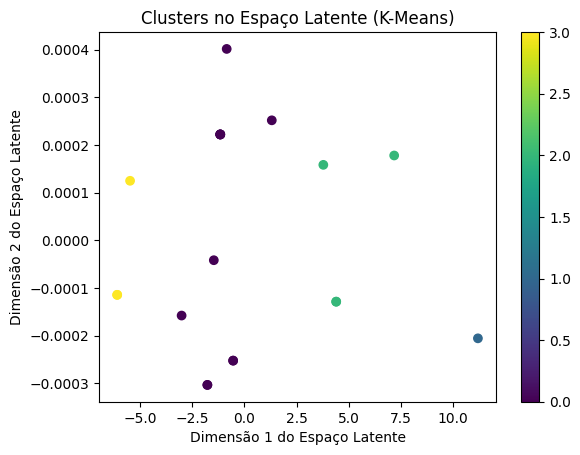

In [26]:
plt.scatter(latent_space_2d[:, 0], latent_space_2d[:, 1], c=kmeans.labels_, cmap='viridis')
plt.title('Clusters no Espaço Latente (K-Means)')
plt.xlabel('Dimensão 1 do Espaço Latente')
plt.ylabel('Dimensão 2 do Espaço Latente')
plt.colorbar()
plt.show()